# Mklearn Tutorial on Real Dataset

This notebook is a demonstration of my implementation of *Linear Support Vector Classifier*.

In [1]:
# import standard packages
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import sklearn
from sklearn import preprocessing
import scipy

In [2]:
# import mklearn and multiclass
LIB_PATH = 'mklearn/'
sys.path.append(LIB_PATH)
import mklearn
import multiclass
importlib.reload(mklearn)
importlib.reload(multiclass)

<module 'multiclass' from 'mklearn/multiclass.py'>

For real world dataset, we will use *Elements of Statistical Learning*'s Vowels dataset. It can be downloaded in the following link:

https://web.stanford.edu/~hastie/ElemStatLearn/data.html

In [3]:
# load dataset
vowel_train = pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.train')
vowel_test = pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.test')
print(vowel_train.shape)
print(vowel_test.shape)
# divide into X and Y
X_train = vowel_train.drop('y', axis=1)
y_train = vowel_train['y']
X_test = vowel_test.drop('y', axis=1)
y_test = vowel_test['y']
# convert into numpy array
X_train, X_test = np.array(X_train), np.array(X_test)
y_train, y_test = np.array(y_train), np.array(y_test)
# check results
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

(528, 12)
(462, 12)
X_train shape: (528, 11)
y_train shape: (528,)
X_test shape: (462, 11)
y_test shape: (462,)


First, we test the mklearn's myLinearSVC on binary classification dataset.

In [104]:
# get subset of vowels data 
def get_data(X, y, classes):
    # get indicies
    c1, c2 = classes[0], classes[1]
    c1_ind, c2_ind = np.where(y == c1)[0], np.where(y == c2)[0]
    # get data subsets
    X_sub = np.concatenate([X[c1_ind,:], X[c2_ind,:]])
    y_sub = np.concatenate([y[c1_ind], y[c2_ind]])
    # relabel y
    y_sub[y_sub == c1] = 1.0
    y_sub[y_sub == c2] = -1.0
    # standardize X
    Xscaler = preprocessing.StandardScaler().fit(X_sub)
    X_sub = Xscaler.transform(X_sub)
    return X_sub, y_sub

X_sub, y_sub = get_data(X_train, y_train, (1, 2))
X_sub_test, y_sub_test = get_data(X_test, y_test, (1, 2))

final objective: 0.88202
final train error: 0.23958
final validation error: 0.28571


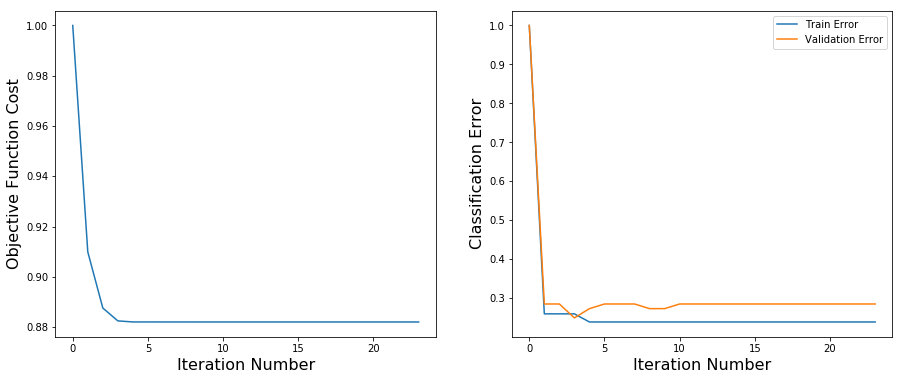

In [109]:
# train binary classification model using myLinearSVC
myLinearSVC_model = mklearn.myLinearSVC(loss='smooth_hinge', tol=1e-6, C=1.0, 
                                        verbose=False, max_iter=1000)
myLinearSVC_model.fit(X_sub, y_sub)
myLinearSVC_model.display_results(X_sub_test, y_sub_test)

Now we train a linear SVM model using mklearn. mklearn does multiclass classification using one-vs-one method. A default regularization penalty value of $1.0$ is used for this demo.

In [29]:
# input parameters
classes = np.arange(11) + 1
penalty = 1.0
max_iter = 1000
n_threads = 10
verbose = False
tol = 1e-6
multi_class = 'ovo'
# fit model
myLinearSVC_model = mklearn.myLinearSVC(loss='smooth_hinge', tol=tol, C=penalty)
myLinearSVC_ovo = multiclass.Multiclass(myLinearSVC_model, classes, multiclass=multi_class,
                                       n_threads=n_threads, Cs=None, k=1) 
myLinearSVC_ovo.fit(X_train, y_train)

ovo multiclass using 1-folds cross-validation
Fitting ovo model for pair (1, 2)
k = 1, no cross-validation case...
fitting with optimal penalty 1.0
Model fit complete. Final objective cost: 0.8820192799859071
Final training error: 0.23958333333333334

Fitting ovo model for pair (1, 3)
k = 1, no cross-validation case...
fitting with optimal penalty 1.0
Model fit complete. Final objective cost: 0.7459935035456859
Final training error: 0.0625

Fitting ovo model for pair (1, 4)
k = 1, no cross-validation case...
fitting with optimal penalty 1.0
Model fit complete. Final objective cost: 0.5907270478459653
Final training error: 0.0625

Fitting ovo model for pair (1, 5)
k = 1, no cross-validation case...
fitting with optimal penalty 1.0
Model fit complete. Final objective cost: 0.5592127172400974
Final training error: 0.0625

Fitting ovo model for pair (1, 6)
k = 1, no cross-validation case...
fitting with optimal penalty 1.0
Model fit complete. Final objective cost: 0.592851186695085
Final t

Model fit complete. Final objective cost: 0.6111357879699109
Final training error: 0.0

Fitting ovo model for pair (6, 9)
k = 1, no cross-validation case...
fitting with optimal penalty 1.0
Model fit complete. Final objective cost: 0.7051375485396294
Final training error: 0.0625

Fitting ovo model for pair (6, 10)
k = 1, no cross-validation case...
fitting with optimal penalty 1.0
Model fit complete. Final objective cost: 0.6668552964081171
Final training error: 0.010416666666666666

Fitting ovo model for pair (6, 11)
k = 1, no cross-validation case...
fitting with optimal penalty 1.0
Model fit complete. Final objective cost: 0.8306521530078835
Final training error: 0.10416666666666667

Fitting ovo model for pair (7, 8)
k = 1, no cross-validation case...
fitting with optimal penalty 1.0
Model fit complete. Final objective cost: 0.8098721986504007
Final training error: 0.11458333333333333

Fitting ovo model for pair (7, 9)
k = 1, no cross-validation case...
fitting with optimal penalty 

In [30]:
# predict and check accuracy
y_train_pred = multiclass.predict_multiclass(X_train, myLinearSVC_ovo.scalers, 
                                             myLinearSVC_ovo.fitted_betas, classes, 
                                             n_threads, 'ovo', multiclass.predict_binary_class)
y_test_pred = multiclass.predict_multiclass(X_test, myLinearSVC_ovo.scalers, 
                                            myLinearSVC_ovo.fitted_betas, classes, 
                                            n_threads, 'ovo', multiclass.predict_binary_class)
ovo_error_train = multiclass.compute_multi_classification_error(y_train, y_train_pred)
ovo_error_test = multiclass.compute_multi_classification_error(y_test, y_test_pred)
print('OVO training error: {}, OVO test error: {}'.format(round(ovo_error_train, 3), 
                                                          round(ovo_error_test, 3)))

Performing multiclass prediction using 10 threads...
Multiclass prediction complete. Elapsed time: 0.105s
Performing multiclass prediction using 10 threads...
Multiclass prediction complete. Elapsed time: 0.113s
OVO training error: 0.299, OVO test error: 0.574


We see training error of $29.9\%$ and test error of $57.4\%$. 